In [536]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [537]:
notebook_dir = os.getcwd()
file_path = os.path.join(notebook_dir, '..', 'data', 'sp500.csv')
df = pd.read_csv(file_path)

In [538]:
def show_scatters(df, x, y, title, log):
    """
    log=false: log scale already applied to the dataframe via np
    log=true: applying log via sns as in google sheets to get the same log scales
    """   
    plt.figure(figsize=(10, 6))
    
    # Define color mapping for categories
    palette = {'Normal': 'gray', 'Big': 'gray', 'Crypto': 'red'}
    
    # Label mapping for axes
    label_map = {
        'log_market_cap': 'Market Cap ($, log scale)',
        'market_cap': 'Market Cap ($, log scale)',
        'log_spread_pct': 'Bid-Ask Spread (%, log scale)',
        'spread_pct_mp': 'Bid-Ask Spread (% vs mid, log scale)',
        'log_avg_vol_10d': 'Average Volume ($, log scale)',
        'avg_vol_10d': 'Average Volume ($, log scale)',
    }

    # Plot data
    sns.scatterplot(data=df, x=x, y=y, hue="category", palette=palette, legend=False)
    
    # Annotations only for 'Big' and 'Crypto'
    for i, point in df.iterrows():
        if point["category"] == 'Big':
            plt.text(
                point[x],
                point[y] * 1.3 if log else point[y] + 0.15,
                str(point["stonk"]),
                color="gray", ha="center", va="center"
            )
        if point["category"] == 'Crypto':
            plt.text(
                point[x],
                point[y] * 1.3 if log else point[y] + 0.15,
                str(point["stonk"]),
                color="red", ha="center", va="center"
            )

    # Setting axis titles based on the label_map
    plt.xlabel(label_map.get(x, x))
    plt.ylabel(label_map.get(y, y))

    # title
    plt.text(0.5, 1.06, title, 
             ha='center', va='center', transform=plt.gca().transAxes, 
             fontweight='bold', fontsize=10)
    # subtitle
    plt.text(0.5, 1.02, 'Point estimates on 2024-06-20 from Polygon.io', 
             ha='center', va='center', transform=plt.gca().transAxes, 
             style='italic', fontsize=9)
    
    # apply log scale
    if log:
        plt.yscale('log')
        plt.xscale('log')

    plt.show()

### Data processing

In [541]:
# Spread
df['spread'] = df['ask_price'] - df['bid_price']
# Spread %
df['spread_pct'] = df.apply(lambda row: ((row['ask_price'] - row['bid_price']) / row['bid_price']) * 100 if row['bid_price'] > 0 else np.nan, axis=1)
# Log of Market Cap
df['log_market_cap'] = np.log10(df['market_cap'])
# Log of Spread %
df['log_spread_pct'] = df['spread_pct'].apply(lambda x: np.log10(x) if x > 0 else np.nan)
# Log of Volume
df['log_avg_vol_10d'] = np.log10(df['avg_vol_10d'])
# Spread Midpoint
df['midpoint'] = (df['ask_price'] + df['bid_price']) / 2
# Spread Midpoint %
df['spread_pct_mp'] = df['spread'] / df['midpoint']

In [542]:
# show top highest spread diffs
df.nlargest(5, 'spread_pct')

,stonk,bid_price,ask_price,avg_vol_10d,market_cap,spread,spread_pct,log_market_cap,log_spread_pct,log_avg_vol_10d,midpoint,spread_pct_mp
435,KEY,13.01,13.90,13743887.2,1.286062e+10,0.89,6.840892,10.109262,0.835113,7.138110,13.455,0.066146
447,DOC,19.00,19.90,4037765.3,1.363929e+10,0.90,4.736842,10.134792,0.675489,6.606141,19.450,0.046272
426,GEN,23.00,23.98,7315130.9,1.487723e+10,0.98,4.260870,10.172522,0.629498,6.864222,23.490,0.041720
368,RF,18.31,19.05,7531695.5,1.731829e+10,0.74,4.041507,10.238505,0.606543,6.876893,18.680,0.039615
441,IPG,29.01,30.00,4209852.1,1.106228e+10,0.99,3.412616,10.043845,0.533087,6.624267,29.505,0.033554


In [543]:
# show top lowest spread diffs
df.nsmallest(5, 'spread_pct')

,stonk,bid_price,ask_price,avg_vol_10d,market_cap,spread,spread_pct,log_market_cap,log_spread_pct,log_avg_vol_10d,midpoint,spread_pct_mp
224,IDXX,502.00,502.01,5.402108e+05,4.096001e+10,0.01,0.001992,10.612360,-2.700704,5.732563,502.005,0.000020
235,MLM,552.86,552.88,4.475714e+05,3.331529e+10,0.02,0.003618,10.522644,-2.441585,5.650862,552.870,0.000036
414,SNA,269.51,269.52,2.802004e+05,1.416442e+10,0.01,0.003710,10.151199,-2.430575,5.447469,269.515,0.000037
246,VRSK,268.68,268.69,6.630715e+05,3.824980e+10,0.01,0.003722,10.582629,-2.429235,5.821560,268.685,0.000037
2,BTC,64874.60,64877.40,3.009913e+10,1.282394e+12,2.80,0.004316,12.108021,-2.364917,10.478554,64876.000,0.000043


In [544]:
big_stocks = ["AAPL", "TSLA", "META", "AMZN", "NFLX", "NVDA"]
crypto_assets = ["BTC", "ETH", "STETH"]
df["category"] = df["stonk"].apply(
    lambda x: (
        "Big" if x in big_stocks else ("Crypto" if x in crypto_assets else "Normal")
    )
)

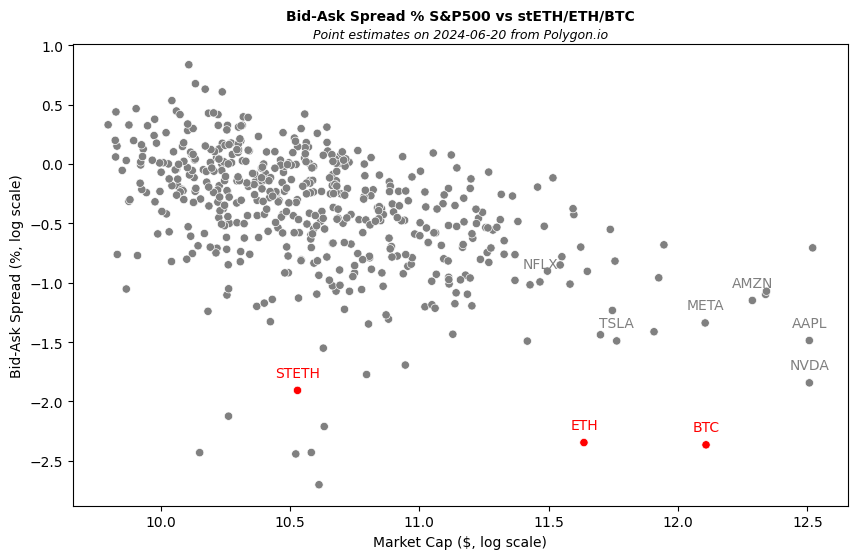

In [545]:
show_scatters(
    df,
    'log_market_cap',
    'log_spread_pct',
    'Bid-Ask Spread % S&P500 vs stETH/ETH/BTC',
    False
)

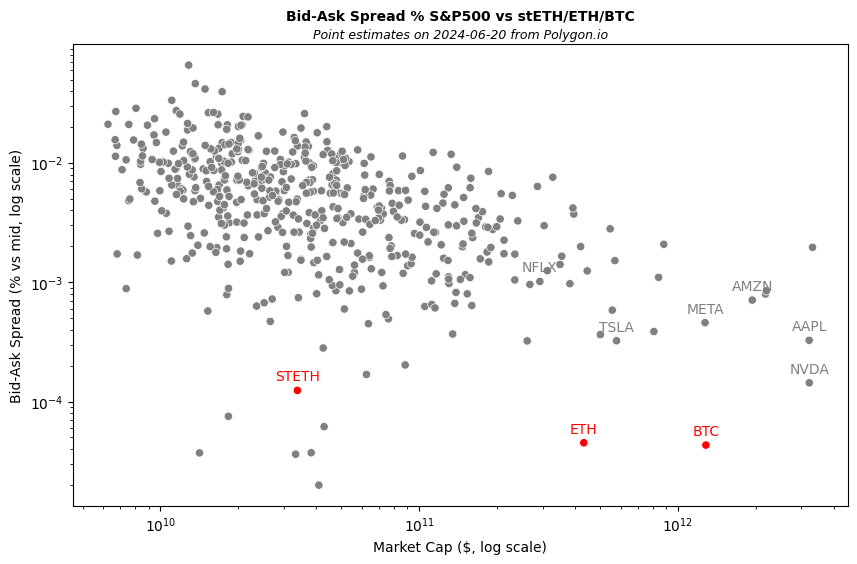

In [546]:
show_scatters(
    df,
    'market_cap',
    'spread_pct_mp',
    'Bid-Ask Spread % S&P500 vs stETH/ETH/BTC',
    True
)

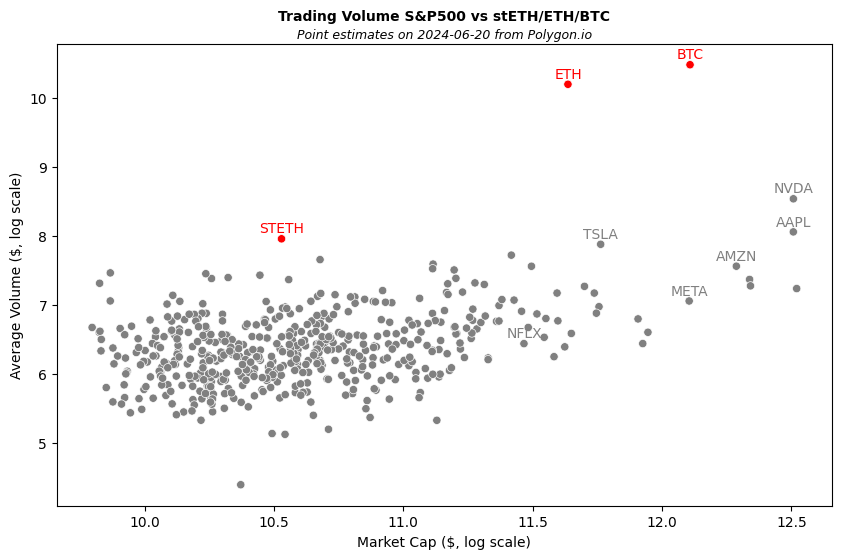

In [547]:
show_scatters(
    df,
    'log_market_cap',
    'log_avg_vol_10d',
    'Trading Volume S&P500 vs stETH/ETH/BTC',
    False,
)

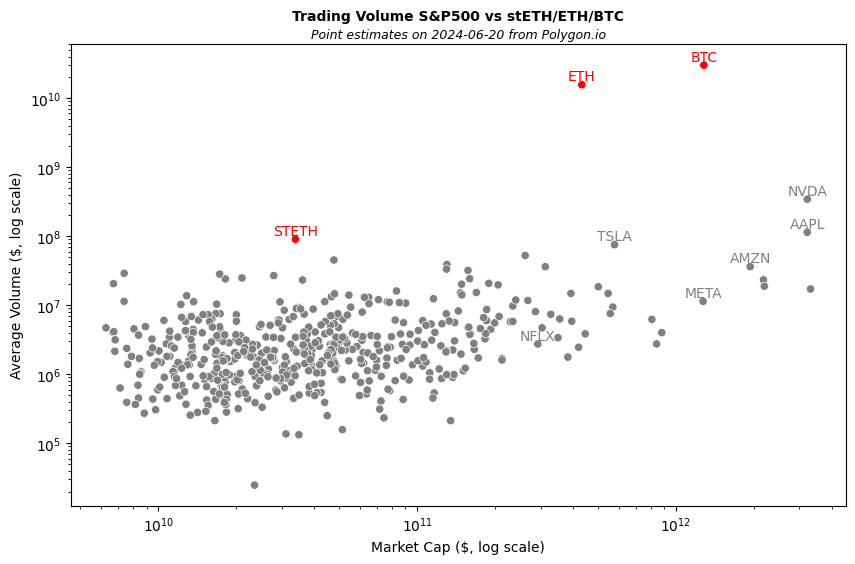

In [548]:
show_scatters(
    df,
    'market_cap',
    'avg_vol_10d',
    'Trading Volume S&P500 vs stETH/ETH/BTC',
    True
)